# Import Libraries

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix 
import seaborn as sn
from sklearn import metrics
from sklearn import svm

# Read the data

In [169]:
path = "C:/Users/Gyatso S/Desktop/DS projects/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(path, names=names)
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Analysis, Preprocessing and Visualization

In [170]:
df.drop(['id'],1, inplace=True)
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [171]:
print(df.shape)

(699, 10)


In [172]:
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness           699 non-null int64
uniform_cell_size         699 non-null int64
uniform_cell_shape        699 non-null int64
marginal_adhesion         699 non-null int64
single_epithelial_size    699 non-null int64
bare_nuclei               699 non-null object
bland_chromatin           699 non-null int64
normal_nucleoli           699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


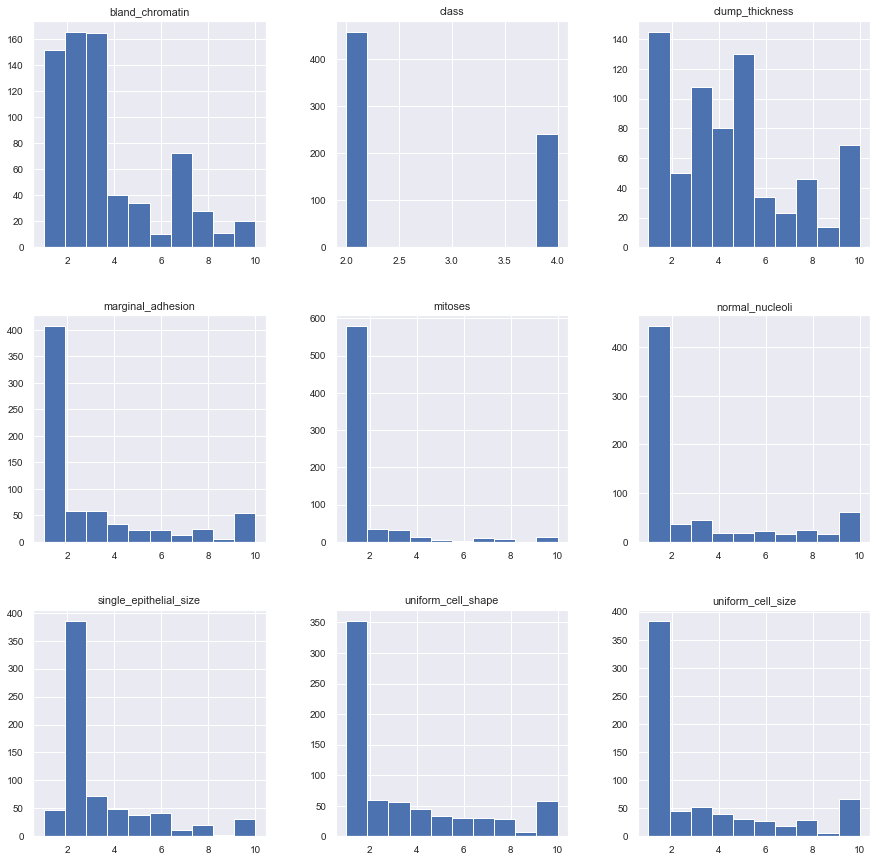

In [174]:
df.hist(figsize = (15, 15))
plt.show()

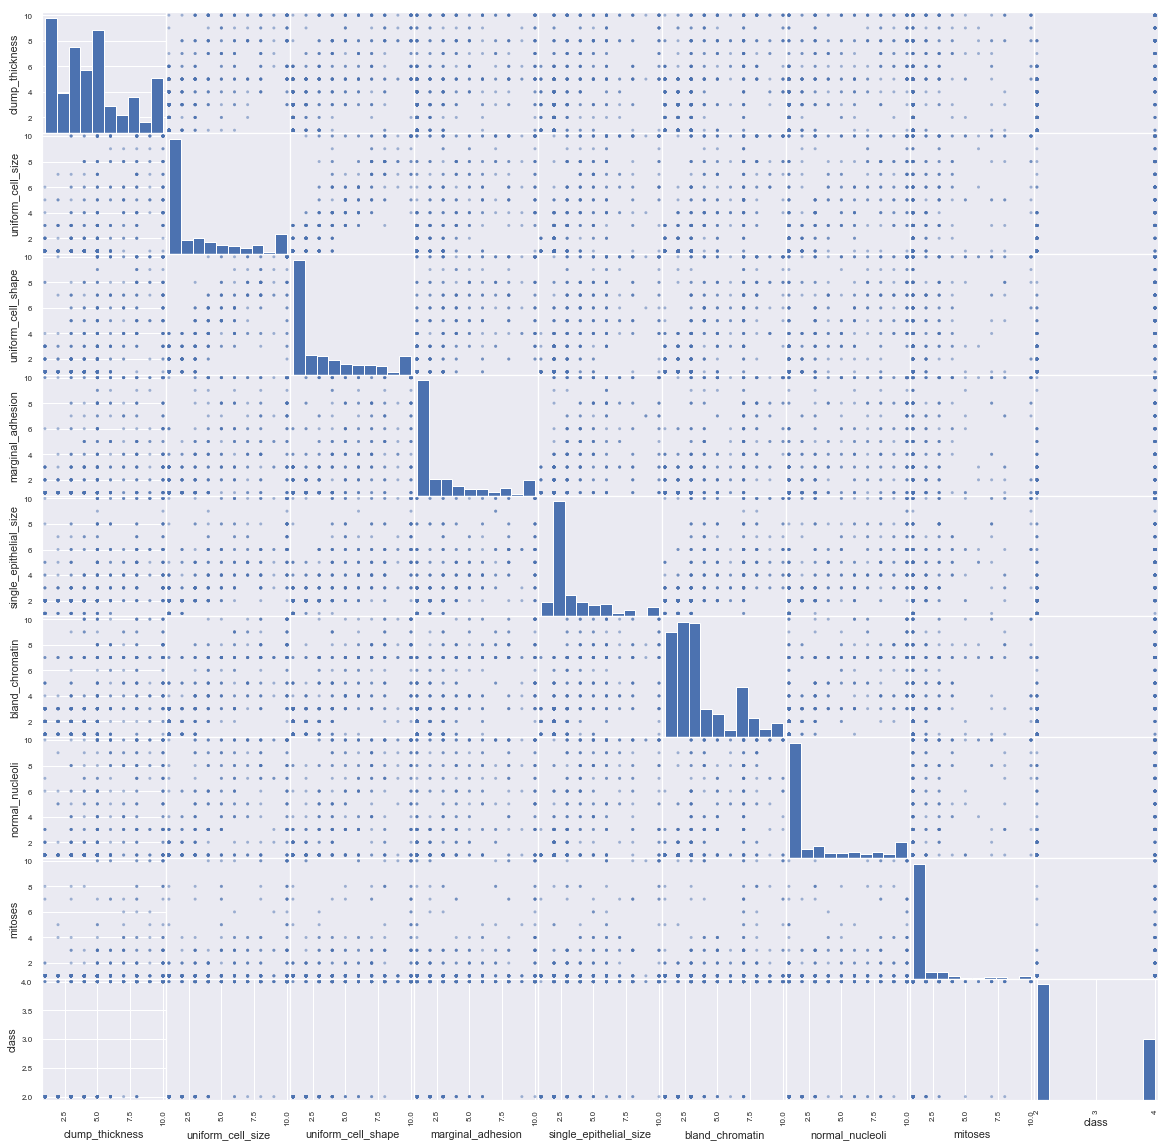

In [175]:
scatter_matrix(df, figsize = (20,20))
plt.show()

In [176]:
corr = df.corr()
corr

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
uniform_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
uniform_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
single_epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [177]:
df.replace('?',-99999, inplace=True)
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


# Applying the classification Models

In [178]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.15)

# KNN

In [179]:
clff = KNN(n_neighbors=6)  
clff.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [180]:
y_pred = clff.predict(X_test)  

Using KNN
Confusion Matrix
[[54  1]
 [ 2 48]]




              precision    recall  f1-score   support

           2       0.96      0.98      0.97        55
           4       0.98      0.96      0.97        50

   micro avg       0.97      0.97      0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

accuracy: 0.9714285714285714


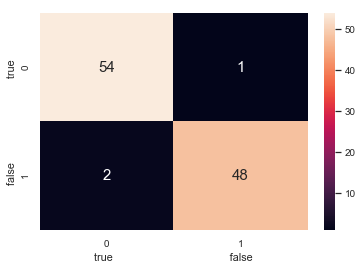

In [181]:
print('Using KNN')
print('Confusion Matrix')
cm=confusion_matrix(y_test, y_pred)
print(cm)  
sn.set(font_scale=0.9)
sn.heatmap(cm, annot=True,annot_kws={"size": 15},)
plt.xlabel('true                                       false')
plt.ylabel('false                            true')
print('\n')
print('\n')
print(classification_report(y_test, y_pred))  


acc=metrics.accuracy_score(y_test, y_pred)
print('accuracy:',acc)

# SVM

In [182]:
clf = svm.SVC(kernel='linear')

In [183]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [184]:
y_pred1 = clf.predict(X_test)

Using Support Vector Machine
Confusion Matrix
[[53  2]
 [ 4 46]]




              precision    recall  f1-score   support

           2       0.93      0.96      0.95        55
           4       0.96      0.92      0.94        50

   micro avg       0.94      0.94      0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105

Accuracy: 0.9428571428571428


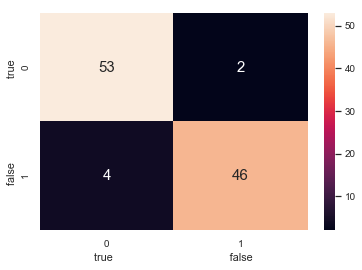

In [185]:
print('Using Support Vector Machine')
cm=confusion_matrix(y_test, y_pred1)
print('Confusion Matrix')
print(cm)  
sn.set(font_scale=0.9)
sn.heatmap(cm, annot=True,annot_kws={"size": 15},)
plt.xlabel('true                                       false')
plt.ylabel('false                            true')
print('\n')
print('\n')
print(classification_report(y_test, y_pred1))  

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))